In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=2d7d1c1c4b9c8b4ceea1e3a6625f05e3977a51f71eaf3d6a996b589e27cca933
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import string
import re
import nltk
import plotly.express as px
from nltk.corpus import stopwords
import emoji
import contractions
from nltk.stem import WordNetLemmatizer
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/sample_data/categorized_new_tweets.csv')
test_data= pd.read_csv('/content/sample_data/Unseen 5pillarsEarthUK.csv',encoding='cp1252', quotechar='"', delimiter=',')

In [ ]:

# Count the number of tweets in each category
category_counts = train_data['category_name'].value_counts()

# Create a bar plot using plotly
fig = px.bar(category_counts, x=category_counts.index, y=category_counts.values,
             labels={'x': 'Category Names', 'y': 'Number of Tweets'},
             title='Number of Tweets in Each Category',
             width=400, height=600)
# Show the plot
fig.show()

In [ ]:
# download stopwords and lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# get stop words
stop_words = set(stopwords.words('english'))
# create lemmatizer
lemmatizer = WordNetLemmatizer()


# define regular expression patterns for removing URLs, HTML tags, and emojis
url_pattern = re.compile(r'http\S+|www\S+')
html_pattern = re.compile('<.*?>')
#emoji_pattern = re.compile('[\U0001f600-\U0001f650]')
emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "they would have"
}

In [ ]:
# function to clean text and lemmatize text
def clean_tokenize_lemmatize(text):
     # remove URLs
    text = re.sub(url_pattern, '', text)
    
    # remove HTML tags
    text = re.sub(html_pattern, '', text)
    
     # remove emojis using regex
    text = re.sub(emoji_pattern, r'', text)
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove digits
    text = re.sub(r'\d+', '', text)
    
     # expand contractions
    text = contractions.fix(text)

    # convert text to lowercase
    text = text.lower()
    
    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # remove stop words, tokenize, and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return tokens
    
    return text

In [ ]:
# apply clean_text function to train data
train_data['text'] = train_data['full_text'].apply(clean_tokenize_lemmatize)


# apply clean_text function to test data
test_data['text'] = test_data['full_text'].apply(clean_tokenize_lemmatize)

In [ ]:
test_data['text']

In [ ]:
train_data['text'] = train_data['text'].apply(lambda x: ' '.join(x))


In [ ]:
train_data['text']

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_df=0.8, min_df=3)
X = vectorizer.fit_transform(train_data['text'])
#test = vectorizer.fit_transform(test_data['text'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_data['category_name'])
y = encoder.transform(train_data['category_name'])

# save the mapping of encoded values to their original labels
#mapping = {i: label for i, label in enumerate(encoder.classes_)}
# Print the mapping between category names and their encoded values
for i, category in enumerate(encoder.classes_):
    print(f"{category} is encoded as {i}")

general_persuasion is encoded as 0
hard_persuasion is encoded as 1
non_persuasive is encoded as 2
soft_persuasion is encoded as 3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
# Generate predictions on the test set
y_pred_classes = np.argmax(y_pred)
y_true = np.argmax(y_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names=encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[1097   53  274   25]
 [  91  284   95    8]
 [ 122    1 1504    0]
 [  94    2  152  106]]
                    precision    recall  f1-score   support

general_persuasion       0.78      0.76      0.77      1449
   hard_persuasion       0.84      0.59      0.69       478
    non_persuasive       0.74      0.92      0.82      1627
   soft_persuasion       0.76      0.30      0.43       354

          accuracy                           0.77      3908
         macro avg       0.78      0.64      0.68      3908
      weighted avg       0.77      0.77      0.75      3908

Accuracy: 0.765353121801433


Text(0.5, 1.0, 'Confusion Matrix')

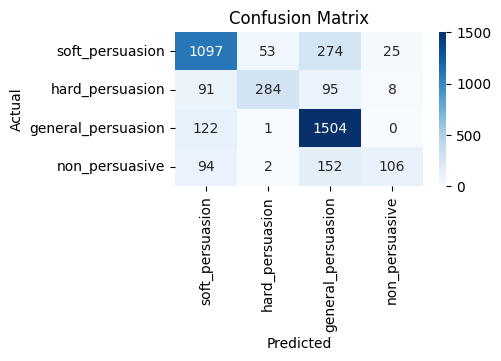

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute and plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4,2))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=train_data['category_name'].unique(),
            yticklabels=train_data['category_name'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

In [ ]:
#don't touch
test_data['text'] = test_data['text'].apply(lambda x: ' '.join(x))

# Predict sentiment on test set
X_test_tfidf = vectorizer.transform(test_data['text'])
y_test_pred = classifier.predict(X_test_tfidf)

# Export predicted categories to excel
test_data['predicted_sentiment'] = y_test_pred

test_data.to_excel('Twitter_SVM.xlsx', index=False)

In [ ]:
  
test_data['text'] = test_data['text'].apply(lambda x: ' '.join(x))
labels = ['non_persuasive','hard_persuasion','general_persuasion','soft_persuasion']
# Predict sentiment on test set
X_test_tfidf = vectorizer.transform(test_data['text'])
y_test_pred = classifier.predict(X_test_tfidf)
y_pred_labels = [labels[np.argmax(p)] for p in y_test_pred]

# Export predicted categories to excel
test_data['predicted_sentiment'] = y_pred_labels

test_data.to_excel('test2.xlsx', index=False)